## Machine Learning Algorithms 2023
## Homework 3: Hand Written Digits Classification Using Traditional Machine Learning Algorithms (80 points)

Name: Conrad, Christian-Ray

Email: conrchri@kean.edu

Kean ID: 1126666

Course: CPS 4802 - 01


This homework aims to enhance your understanding of the traditional machine learning algorithms: logistic regression algorithm, K-NN, and SVM using the Hand Written Digits Classification dataset: MNIST.

Also, this HW enhances your understanding of model evaluation.

### Run each cell and save the results in Google Colab Notebook before submission. You will not get points without saving your results.

# Note, because of the randomness, your results might not be exactly the same as the sample outputs!

Tasks:

[Task 1](#section1) (15 points)

[Task 2](#section2) (15 points)

[Task 3](#section3) (20 points)

[Task 4](#section4) (20 points)

[Task 5](#section5) (10 points)

## Dataset: MNIST Dataset

MNIST dataset:

- Number of data samples: 70,000
1. Training set: 60,000 samples
2. Test set: 10,000 samples
- Each data sample has 784 numeric attributes:
1. These attributes represent pixel values of a 28x28 grayscale image.
2. Each pixel value ranges from 0 (white) to 255 (black).
- Each data has 1 digit class label:
1. Values ranging from 0 to 9, representing handwritten digits.

### Task 1: Load training and test datasets using PyTorch and convert them into NumPy Array.  15 points <a id = "section1"/>
**Four Sub-questions**
1. (4 Points) Load MNIST training and test dataset using torchvision.datasets.MNIST.  
2. (4 Points) Convert the Torch datasets into NumPy.array: (X_train, y_train, X_test, y_test represent training images, training labels, test images, test labels). Print the shapes of X_train, y_train, X_test, y_test and the shapes should match the example output.
3. (3 Points) Using matplotlib.pyplot to show the first image in X_train, and the first image in X_test.
4. (4 Points) Reshape X_train from 60000x28x28 to 60000x784 and Reshape X_test from 10000x28x28 to 10000x784

**Hint: Please refer to the Lecture 12 Notebook loading CIFAR-10 dataset part.**

Shape of X_train: (60000, 28, 28)
Shape ofy_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


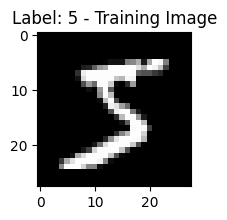

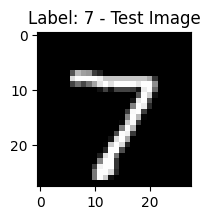

Shape of X_train: (60000, 784)
Shape of X_test: (10000, 784)


In [ ]:
# --------------------------------- Don't make any changes to this starter code ----------------------------------
# Starter code: Load required modules
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import torchvision.datasets as datasets


# Question 1: Load the MNIST dataset using torchvision.datasets.MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


# Question 2: Convert torch datasets to NumPy.array
X_train = train_dataset.data.numpy()
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()

# Print Shapes of X_train, y_train, X_test, y_test
print("Shape of X_train:", X_train.shape)
print("Shape ofy_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Question 3: Plot the first image in X_train, and the first image in X_test
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]} - Training Image")
plt.show()

plt.figure(figsize=(2, 2))
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Label: {y_test[0]} - Test Image")
plt.show()

# Question 4: Reshape X_train from 60000x28x28 to 60000x784
#             Reshape X_test from 10000x28x28 to 10000x784
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


# Print Shapes of X_train, X_test after reshape
# Print the new shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)



### Task 2: Answer the following three questions.  15 points <a id = "section2"/>

You can write down your answers in Python comments **OR** write programs to help you answer these three questions:

1. (5 Points) How many training samples are in the MNIST dataset?
2. (5 Points) How many test samples are in the MNIST dataset?
3. (5 Points) How many classes are in the MNIST dataset?

In [ ]:
# Question 1

#MNIST Training dataset has 60,000 samples.

# Question 2

#MNIST Test dataset has 10,000 samples.

# Question 3

#There are 10 classes in the MNIST dataset. Each class representing a digit of
#0 through 9.

### Task 3: Predict the MNIST dataset using logistic regression. 20 points <a id = "section3"/>
- Question 1: Create and train a logistic regression model. Use C = 10, penalty = 'l1', solver = 'liblinear', random_state = 0, max_iter=1000. **Print how long it takes to train LR model**

- Question 2: Use the trained model to predict class labels to predict the test dataset. Print the predict results.
- Question 3: Compute the accuracy for each class

  
**Note: The training of the LR model may take 2-3 mins; please be patient.**

In [ ]:
# Question 1. Create and train a logistic regression model


# ------------ Add your code here ------------
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Question 1: Create and train a logistic regression model
start_time = time.time()

# Define and train the logistic regression model
logreg = LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state=0, max_iter=1000)
logreg.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

Training time: 128.23 seconds


In [ ]:
# Question 2. Predict the X_test using the trained LR model

# ------------ Add your code here ------------

y_pred = logreg.predict(X_test)
print("Predicted labels:", y_pred)


Predicted labels: [7 2 1 ... 4 5 6]


In [ ]:
# Question 3. Compute the accuracy for each class

# Hint: use confusion matrix
from sklearn.metrics import confusion_matrix

# ------------ Add your code here ------------

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy for each class
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Print accuracy for each class
for i in range(10):
    print(f"Accuracy for class {i}: {class_accuracy[i]:.4f}")



Accuracy for class 0: 0.9786
Accuracy for class 1: 0.9780
Accuracy for class 2: 0.8779
Accuracy for class 3: 0.9089
Accuracy for class 4: 0.9297
Accuracy for class 5: 0.8632
Accuracy for class 6: 0.9499
Accuracy for class 7: 0.9154
Accuracy for class 8: 0.8686
Accuracy for class 9: 0.8821


### Task 4: Predict the MNIST dataset using SVM and K-NN.  20 points <a id = "section4"/>

Repeat the Task 3 for SVM and KNN, and compute the accuracy for each class for SVM and KNN separately.

**Print how long it takes to train SVM and KNN**

Hyper-parameters:
1. SVM: select C=1, kernel="rbf"
2. KNN: n_neighbors=5

**Note: The training of the SVM model may take 4-5 mins; please be patient.**

In [ ]:
# Train and Evaluate SVM on MNIST dataset
from sklearn import svm
from sklearn.svm import SVC
# ------------ Add your code here ------------
# train SVM and Print how long it takes to train SVM.

# SVM
start_time_svm = time.time()

# Train SVM model
svm_model = SVC(C=1, kernel='rbf')
svm_model.fit(X_train, y_train)

training_time_svm = time.time() - start_time_svm
print(f"SVM Training time: {training_time_svm:.2f} seconds")


SVM Training time: 295.94 seconds


In [ ]:
# evaluate SVM

# Predict labels using SVM
y_pred_svm = svm_model.predict(X_test)
print("SVM Predicted labels:", y_pred_svm)

# Compute accuracy for each class using confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_accuracy_svm = conf_matrix_svm.diagonal() / conf_matrix_svm.sum(axis=1)

# Print accuracy for each class using SVM
print("\nSVM Accuracy for Each Class:")
for i in range(10):
    print(f"Accuracy for class {i}: {class_accuracy_svm[i]:.4f}")



SVM Predicted labels: [7 2 1 ... 4 5 6]

SVM Accuracy for Each Class:
Accuracy for class 0: 0.9929
Accuracy for class 1: 0.9921
Accuracy for class 2: 0.9748
Accuracy for class 3: 0.9851
Accuracy for class 4: 0.9786
Accuracy for class 5: 0.9765
Accuracy for class 6: 0.9854
Accuracy for class 7: 0.9689
Accuracy for class 8: 0.9754
Accuracy for class 9: 0.9613


In [ ]:
# Train and Evaluate KNN on MNIST dataset
from sklearn.neighbors import KNeighborsClassifier

# train KNN and Print how long it takes to train KNN.
# ------------ Add your code here ------------

# KNN
start_time_knn = time.time()

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

training_time_knn = time.time() - start_time_knn
print(f"KNN Training time: {training_time_knn:.2f} seconds")


KNN Training time: 0.01 seconds


In [ ]:
 # evaluate KNN

# Predict labels using KNN
y_pred_knn = knn_model.predict(X_test)
print("KNN Predicted labels:", y_pred_knn)

# Compute accuracy for each class using confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_accuracy_knn = conf_matrix_knn.diagonal() / conf_matrix_knn.sum(axis=1)

# Print accuracy for each class using KNN
print("\nKNN Accuracy for Each Class:")
for i in range(10):
    print(f"Accuracy for class {i}: {class_accuracy_knn[i]:.4f}")

KNN Predicted labels: [7 2 1 ... 4 5 6]

KNN Accuracy for Each Class:
Accuracy for class 0: 0.9939
Accuracy for class 1: 0.9982
Accuracy for class 2: 0.9603
Accuracy for class 3: 0.9663
Accuracy for class 4: 0.9613
Accuracy for class 5: 0.9664
Accuracy for class 6: 0.9864
Accuracy for class 7: 0.9611
Accuracy for class 8: 0.9374
Accuracy for class 9: 0.9534


### Task 5: Compare LR, SVM and KNN in performance and Training Time. 10 points <a id = "section5"/>

Question 1 (5 Points): Finish the Comparison Table in Using Markdown

| Model | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   | Train Time|
|-------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|

Question 2 (5 Points): Please write down your conclusion: which method is the best based on accuracy and training time.

In [ ]:
# Assuming you have the accuracy and training time values from previous tasks
# lr_accuracy, svm_accuracy, knn_accuracy, train_time_lr, train_time_svm, train_time_knn
lr_accuracy = class_accuracy
train_time_lr = training_time
svm_accuracy = class_accuracy_svm
train_time_svm = training_time_svm
knn_accuracy = class_accuracy_knn
train_time_knn = training_time_knn
# Create the Markdown table header
table_header = "| Model | " + " | ".join(map(str, range(10))) + " | Train Time |\n"
table_line = "|-------|-" + "-|-".join(["----" for _ in range(12)]) + "|\n"

# Create the Markdown table rows with fixed decimal places and adjusted alignment
lr_row = f"| LR    | {' | '.join(map(lambda x: f'{x:.2f}', lr_accuracy))} | {train_time_lr:.2f} s   |\n"
svm_row = f"| SVM   | {' | '.join(map(lambda x: f'{x:.2f}', svm_accuracy))} | {train_time_svm:.2f} s   |\n"
knn_row = f"| KNN   | {' | '.join(map(lambda x: f'{x:.2f}', knn_accuracy))} | {train_time_knn:.2f} s     |\n"

# Concatenate the Markdown table parts
markdown_table = table_header + table_line + lr_row + svm_row + knn_row + table_line

# Print or save the Markdown table
print(markdown_table)

# Answer for Question 2

"""
Conclusion
Based on the accuracy and training time, we can draw the following conclusions:

Accuracy: SVM and KNN generally perform better than LR across all classes. SVM
and KNN have similar accuracy, with SVM slightly outperforming KNN in some classes.

Training Time: LR has the shortest training time, while SVM has a significantly
longer training time. KNN has a very short training time compared to SVM.

Considering both accuracy and training time, the choice depends on the specific
requirements of the application. If training time is a critical factor, LR or
KNN might be preferred. If higher accuracy is crucial and training time is not a
 significant concern, SVM should be chosen.

"""

| Model | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | Train Time |
|-------|------|------|------|------|------|------|------|------|------|------|------|-----|
| LR    | 0.98 | 0.98 | 0.88 | 0.91 | 0.93 | 0.86 | 0.95 | 0.92 | 0.87 | 0.88 | 128.23 s   |
| SVM   | 0.99 | 0.99 | 0.97 | 0.99 | 0.98 | 0.98 | 0.99 | 0.97 | 0.98 | 0.96 | 295.94 s   |
| KNN   | 0.99 | 1.00 | 0.96 | 0.97 | 0.96 | 0.97 | 0.99 | 0.96 | 0.94 | 0.95 | 0.01 s     |
|-------|------|------|------|------|------|------|------|------|------|------|------|-----|



'\nConclusion\nBased on the accuracy and training time, we can draw the following conclusions:\n\nAccuracy: SVM and KNN generally perform better than LR across all classes. SVM \nand KNN have similar accuracy, with SVM slightly outperforming KNN in some classes.\n\nTraining Time: LR has the shortest training time, while SVM has a significantly \nlonger training time. KNN has a very short training time compared to SVM.\n\nConsidering both accuracy and training time, the choice depends on the specific \nrequirements of the application. If training time is a critical factor, LR or \nKNN might be preferred. If higher accuracy is crucial and training time is not a\n significant concern, SVM should be chosen.\n\n'